In [7]:
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

           탑승     하차       소요시간
0          박촌     부평  28.675501
1         원인재     선학  12.850614
2       간석오거리  캠퍼스타운  42.736982
3       부평삼거리     귤현  41.520651
4       인천대입구     작전  75.390910
...       ...    ...        ...
99995  지식정보단지     동막  13.775766
99996    부평구청  테크노파크  58.946604
99997    부평시장  테크노파크  59.279655
99998   센트럴파크     계양  92.134176
99999   캠퍼스타운     동막  10.086242

[100000 rows x 3 columns]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[2.72247017e+00 3.16455987e+00 4.33616252e+00 4.31322422e+00
 2.64537886e+00 1.53217590e+00 4.35539521e+00 5.58975469e+00
 2.06033570e+00 4.23483601e+00 4.88513667e+00 2.94939704e+00
 2.95698775e+00 2.57081626e+00 2.84843369e+00 5.11828945e+00
 4.94112028e+00 2.45981566e+00 4.

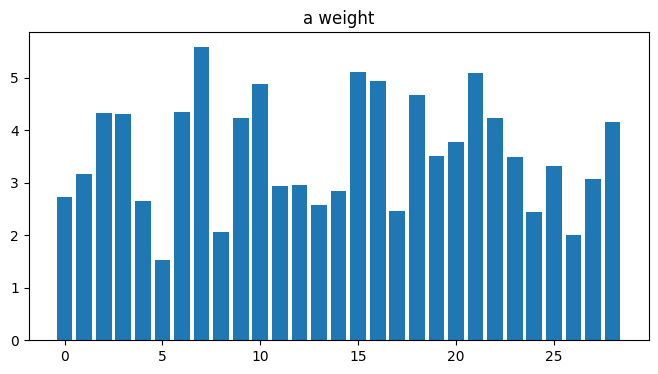

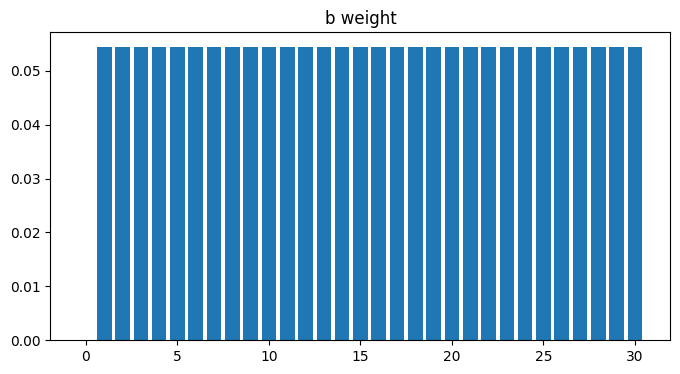

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

name = { 0:"계양", 1:"귤현", 2:"박촌", 3:"임학", 4:"계산", 5:"경인교대입구", \
         6:"작전", 7:"갈산", 8:"부평구청", 9:"부평시장", 10:"부평", 11:"동수", \
         12:"부평삼거리", 13:"간석오거리", 14:"인천시청", 15:"예술회관", \
         16:"인천터미널", 17:"문학경기장", 18:"선학", 19:"신연수", 20:"원인재", \
         21:"동춘", 22:"동막", 23:"캠퍼스타운", 24:"테크노파크", 25:"지식정보단지", \
         26:"인천대입구", 27:"센트럴파크", 28:"국제업무지구", 29:"송도달빛축제공원" }

inv_name = dict( zip(name.values(), name.keys()) )

data = pd.read_csv( "https://jonghank.github.io/ase2010/files/passenger_data.csv", index_col=0)

n = len(name)
K = len(data)

##################
# your code here

# print(n)
# print(inv_name)
print(data)


# print([data['탑승'][i] for i in range(K)])
# print([inv_name[data['탑승'][i]] for i in range(K)])
# print([inv_name[data['하차'][i]] for i in range(K)])

X_a = np.zeros((K, n))
X_b = np.zeros((K, n))

for k in range(K):
    # print(inv_name[data['하차'][k]], end=' ')
    i = inv_name[data['탑승'][k]]
    j = inv_name[data['하차'][k]]
    
    if i < j:
        X_a[k, i:j] = 1
    else:
        X_a[k, j:i] = 1
    
    X_b[i, j] = 1
    X_b[j, i] = 1

print(X_a)
print(X_b)

X = np.hstack([X_a, X_b])
t_obs = data['소요시간'].values.astype(float)

theta = np.linalg.lstsq(X, t_obs, rcond=None)[0]

print(theta)
a_hat = theta[:n-1]
b_hat = theta[n-1:]

plt.figure(figsize=(8,4))
plt.title('a weight')
plt.bar(range(n-1), a_hat)
plt.show()


plt.figure(figsize=(8,4))
plt.title('b weight')
plt.bar(range(n+1), b_hat)
plt.show()

In [9]:
t_pred = X@theta

RMSE = np.sqrt(np.mean((t_obs-t_pred)**2))
print(RMSE)

2.538030701357107


In [10]:
start = inv_name['예술회관']
end = inv_name['테크노파크']

T_a = np.zeros(n)
T_b = np.zeros(n)

T_a[start:end] = 1
T_b[start] = 1
T_b[end] = 1

T_stack = np.hstack([T_a, T_b])

time = T_stack@theta
print(time+5)

42.43949237710671


### Soft landing

In [11]:
import numpy as np
import matplotlib.pyplot as plt

N = 200
tf = 20
ts = np.linspace(0,tf,N+1)
dt = tf/N
gamma = .05
g = 9.8

A = np.array([[1, 0, (1-0.5*gamma*dt)*dt,                   0],
              [0, 1,                   0, (1-0.5*gamma*dt)*dt],
              [0, 0,        (1-gamma*dt),                   0],
              [0, 0,                   0,        (1-gamma*dt)]])
B = np.array([[0.5*dt**2,         0],
              [        0, 0.5*dt**2],
              [       dt,         0],
              [        0,        dt]])
b = np.array([0, -0.5*g*dt**2, 0, -g*dt])

x0 = np.array([-200, 2000, 40, -300])
x_des = np.array([0, 0, 0, 0])

In [12]:
# draw plots
def draw_plots(ts,x,u):
    # ts: time, (N+1,)-vector
    # x: state trajectory, 4x(N+1) matrix
    # u: control vector, 2xN matrix
    labels = [r'$p_x$',r'$p_y$',r'$v_x$',r'$v_y$',r'$u_x$',r'$u_y$']
    plt.figure(figsize=(14,9), dpi=100)
    for i in range(4):
        plt.subplot(3,2,i+1)
        plt.plot(ts,x[i],label=labels[i])
        plt.legend()
        plt.grid()
    for i in range(2):
        plt.subplot(3,2,i+5)
        plt.plot(ts[:-1],u[i],label=labels[i+4])
        plt.xlabel(r'$t$')
        plt.legend()
        plt.grid()
    plt.show()
    return

# draw 2D plot
def draw_2d_traj(x,u,t1):
    # x: state trajectory, 4x(N+1) matrix
    # u: control vector, 2xN matrix
    N = u.shape[1]
    plt.figure(figsize=(10,10), dpi=100)
    plt.title('Soft landing guidance')
    plt.plot(x[0,:],x[1,:], label='Trajectory')
    _ = 10

    for i in range(0, N, 10):
        __ = np.linalg.norm(u[:,i])/200
        plt.quiver(x[0,i],x[1,i],-u[0,i]*_,-u[1,i]*_, color='magenta', headwidth=1)
        plt.quiver(x[0,i],x[1,i],u[0,i]/__,u[1,i]/__, color='gray', headlength=0, headaxislength=0)

    plt.plot(x[0,0], x[1,0], 'o', markersize=7, label='Initial position')
    plt.plot(x[0,t1], x[1,t1], '*', markersize=7, label=f'Waypoint #1')
    plt.plot(x[0,-1], x[1,-1], '^', markersize=7, label='Final position')

    plt.ylim(-200, 2200)
    plt.xlim(-600,600)
    plt.xlabel(r'$x$ position')
    plt.ylabel(r'$y$ position')
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()
    return

150


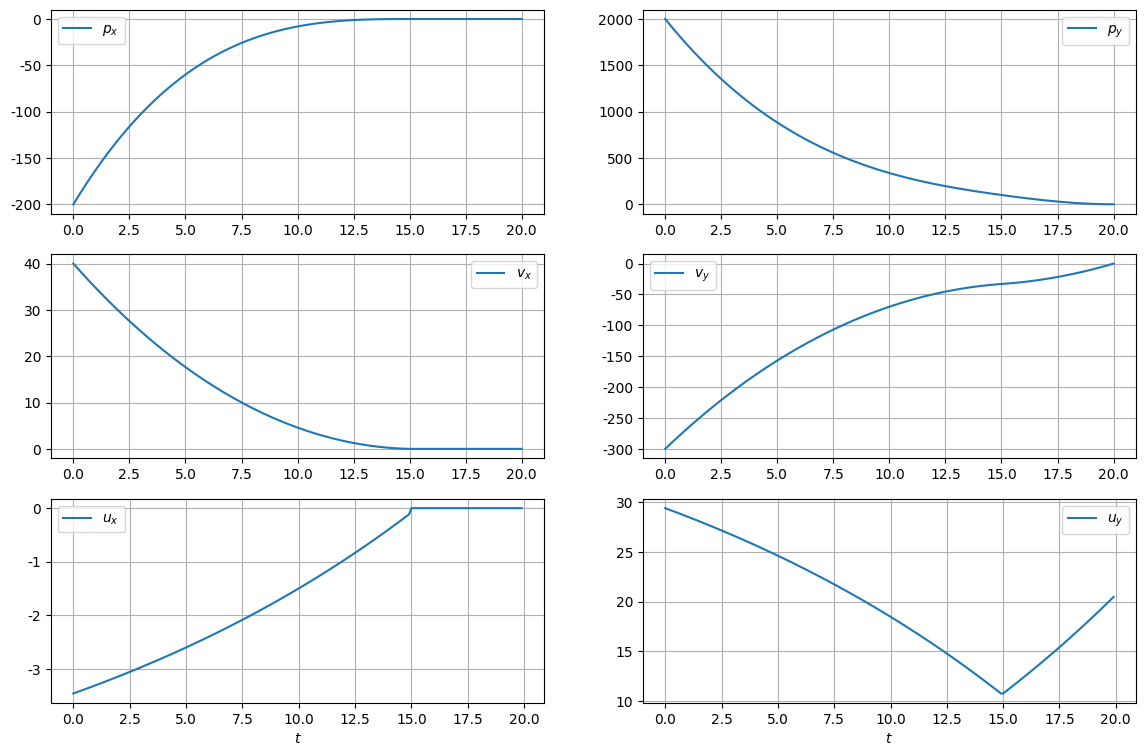

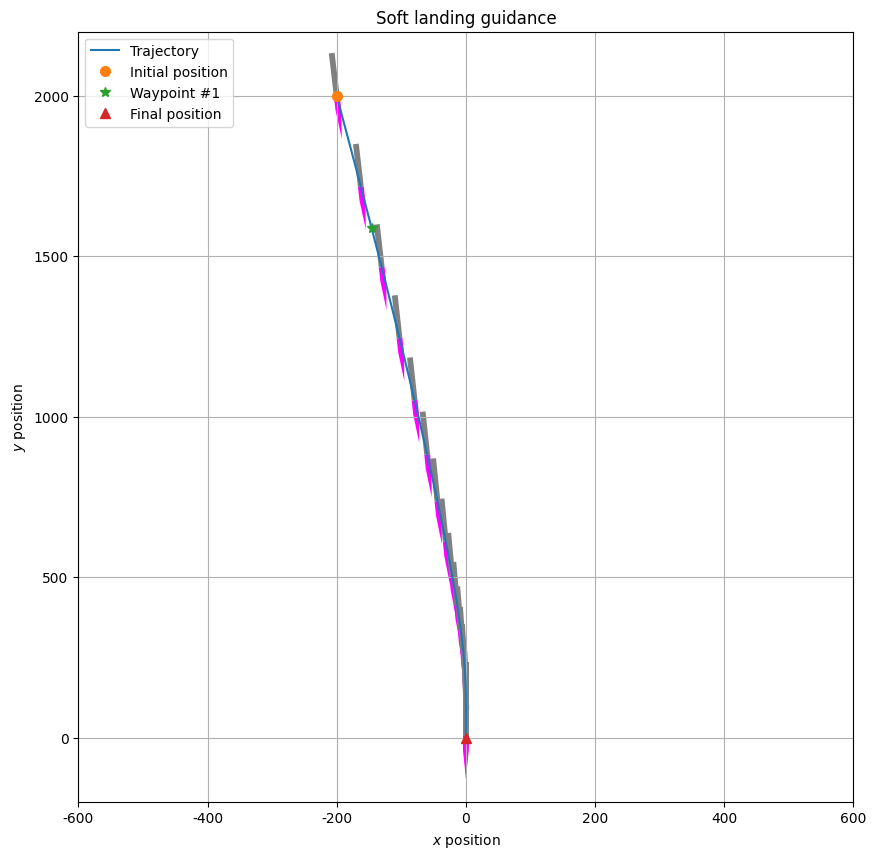

In [33]:
##################
# your code here
G = np.zeros((4,2*N))
for t in range(N):
    G[:, 2*t:2*(t+1)] = np.linalg.matrix_power(A, max(0, N-t-1))@B

# np.hstack()
# u_hat = np.linalg.lstsq(G, x_des - np.linalg.matrix_power(A, N)@x0 - N*(A@b), rcond=None)[0]
# u = u_hat.reshape(N,2).T

x = np.zeros((4, N+1))
t1 = 15
t_15 = int(t1/dt)
print(t_15)

x_N = np.linalg.matrix_power(A, N)@x0
for t in range(N):
    x_N += np.linalg.matrix_power(A, t)@b

x_15 = np.linalg.matrix_power(A, t_15)@x0
for i in range(t_15):
    x_15 += np.linalg.matrix_power(A, i) @ b

G_15 = np.zeros((4, 2*t_15))
for k in range(t_15):
    G_15[:, 2*k:2*(k+1)] = np.linalg.matrix_power(A, t_15-1-k) @ B

C = np.zeros((7, 2*N))
d = np.zeros(7)

C[0:4, :] = G
d[0:4]    = x_des - x_N

C[4:7,:2*t_15] = G_15[[0, 1, 2],:]
d[4:7]   = np.array([0, 100, 0])-x_15[[0, 1, 2]]

theta = np.linalg.lstsq(C, d, rcond=None)[0]

x = np.zeros((4, N+1))
x[:,0] = x0
pos = x0.copy()
for i in range(N):
    u_vec = theta[2*i:2*(i+1)]
    pos = A@pos + B@u_vec + b
    x[:,i+1] = pos

u = theta.reshape(N,2).T

# draw plots
draw_plots(ts,x,u)
draw_2d_traj(x,u,t1)

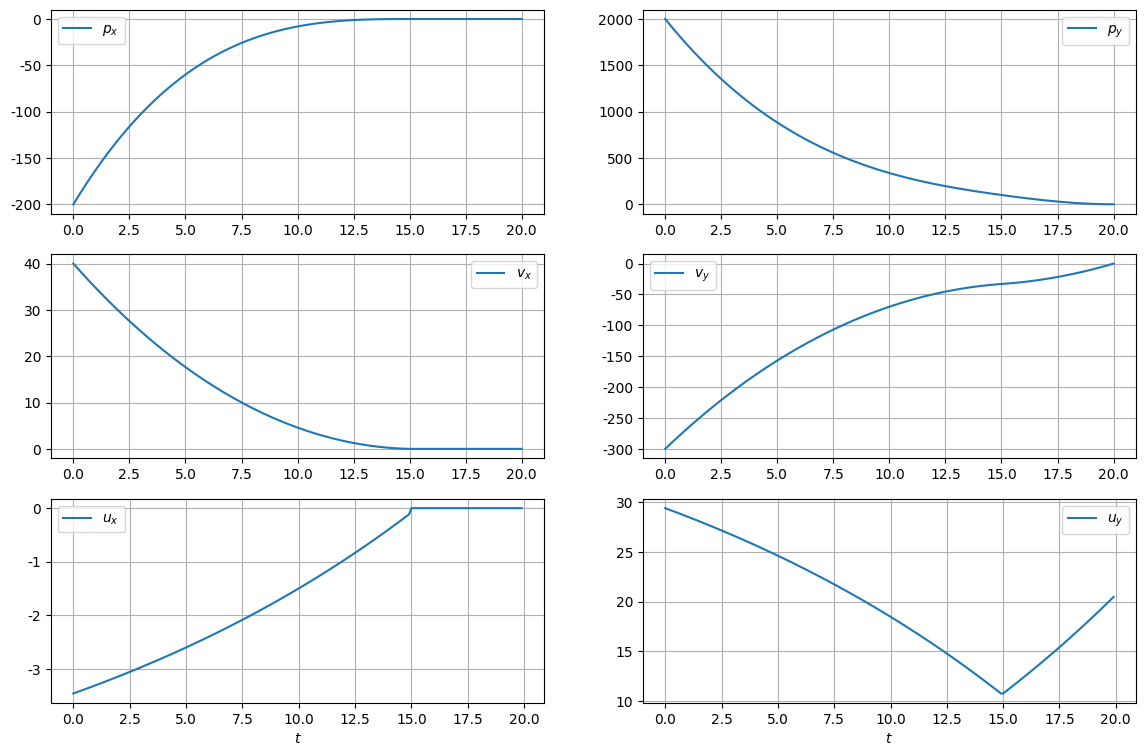

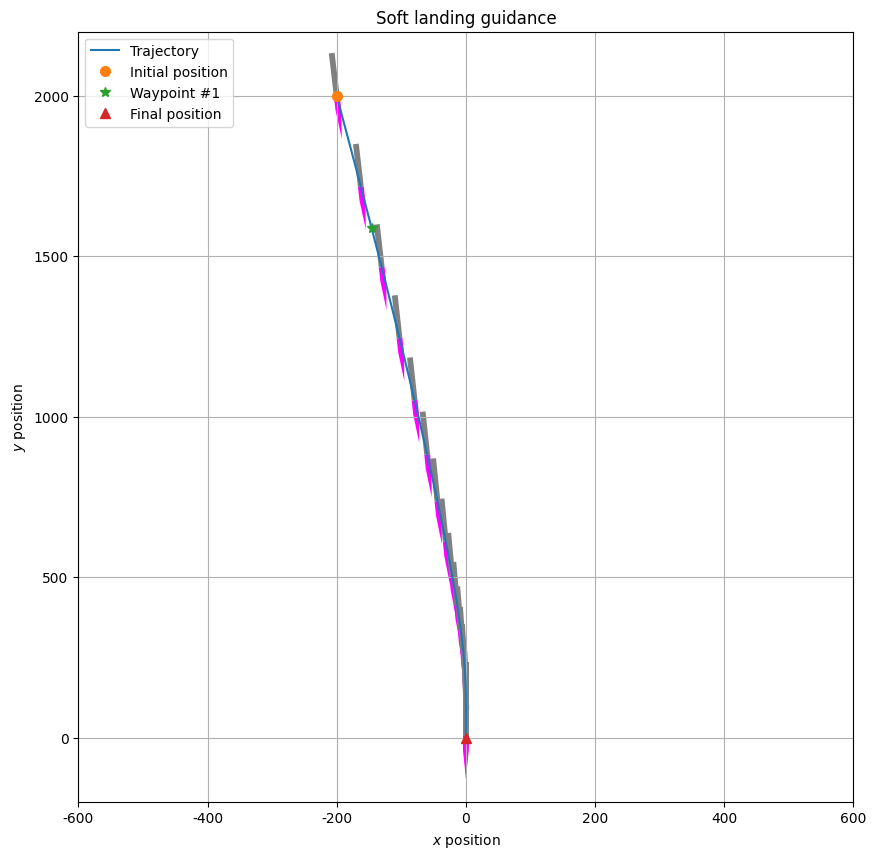

In [34]:
# draw plots
draw_plots(ts,x,u)
draw_2d_traj(x,u,t1)